**Repository**: https://github.com/EstebanMqz/SP500-Risk-Optimized-Portfolios-PostCovid-ML

### <font color= 'orange'> **S & P 500 Risk Optimized Portfolios PostCovid ML** <font> 

In [2]:
#Import dependencies
import functions as fn
import data as dt
import visualizations as vs

#Libraries
import numpy as np
import pandas as pd
import matplotlib as plt

import scipy
import scipy.stats as st
from scipy import optimize

import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from yahoofinancials import YahooFinancials 
from tabulate import tabulate
import IPython.display as d

import datetime 
import time

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

##### <span style='color:red'> Project Creators:</span> Create requirements.txt file.<br>

In [3]:
docstring = """
# -- --------------------------------------------------------------------------------------------------  -- # 
# -- project: S&P500-Risk-Optimized-Portfolios-PostCovid-ML                                              -- # 
# -- script: requirements.txt: txt file to download Python modules for execution                         -- # 
# -- author: EstebanMqz                                                                                  -- # 
# -- license: CC BY 3.0                                                                                  -- # 
# -- repository: SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/requirements.txt                 -- #                                  
# -- --------------------------------------------------------------------------------------------------  -- # 
\n
"""

fn.get_requirements(docstring)

requirements.txt file created in local path: c:\Users\Esteban\Desktop\Projects\Github\Repos_To-do\Languages\Python\Fin_Sim\Simulation_Course_Exams\SP500-Risk-Optimized-Portfolios-ML\requirements.txt


##### <span style='color:green'> Project Users:</span> Install libraries in requirements.txt file.<br>

In [4]:
dt.library_install("requirements.txt")

Requirements installed.

# -- --------------------------------------------------------------------------------------------------  -- # 
# -- project: S&P500-Risk-Optimized-Portfolios-PostCovid-ML                                              -- # 
# -- script: requirements.txt: txt file to download Python modules for execution                         -- # 
# -- author: EstebanMqz                                                                                  -- # 
# -- license: CC BY 3.0                                                                                  -- # 
# -- repository: SP500-Risk-Optimized-Portfolios-PostCovid-ML/blob/main/requirements.txt                 -- #                                  
# -- --------------------------------------------------------------------------------------------------  -- # 


numpy >= 1.23.5 
pandas >= 1.4.4 
matplotlib >= 3.5.3 
scipy >= 1.7.3 
sklearn >= 1.0.2 
jupyter >= 1.0.0 
yahoofinanicals >= 1.14 
tabulate >= 0.8.9 
IPython >= 8

*Fetching a lot of data from Yahoo Finance by batches is required to avoid host disruptions. Other sources could be used too.*<br>

In [4]:
tickers=fn.SP500_tickers(50)
tickers[0][:5], tickers[-1][-5:]

(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN'], ['ZION', 'ZTS'])

In [16]:
data = pd.concat([dt.get_historical_price_data(tickers[i][j], 6) for i in range(0, len(tickers)) for j in range(0, len(tickers[i]))], axis=1)

In [18]:
data.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
formatted_date,,,,,,,,,,,,,,,,,,,,,
2017-05-03,162.043854,48.743839,39.475151,51.116432,109.965675,51.255013,34.894707,134.850006,86.048775,132.375244,...,122.974777,172.568222,117.194092,37.648579,46.482605,61.688683,93.940002,110.681953,34.834156,53.488342
2017-05-04,163.585312,49.456680,40.260685,51.491741,110.440979,51.507210,35.815437,134.610001,87.451859,134.219681,...,130.618866,169.673080,115.769318,37.825409,47.934036,62.348507,94.290001,108.290924,34.911404,56.644333
2017-05-05,163.495132,49.925892,40.305840,51.307919,111.080849,52.215321,35.840771,134.839996,87.619537,134.377319,...,132.325714,171.202072,113.739258,37.934875,48.659733,62.637730,96.559998,108.003632,34.980083,57.221653
2017-05-08,162.880142,49.483749,40.341949,50.710514,110.706100,52.370518,36.288464,135.119995,85.333954,136.221771,...,132.408264,170.975891,111.932678,38.002243,48.566692,62.493114,96.690002,108.346542,35.366371,56.586601
2017-05-09,162.314377,49.483749,40.332912,50.679886,110.669525,52.981621,35.781651,135.600006,85.669304,135.433914,...,130.407822,169.881195,115.448708,37.699104,48.241055,62.149662,98.449997,109.968353,35.134594,57.183159


In [29]:
data.tail()
data.to_csv("sp500.csv")

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
formatted_date,,,,,,,,,,,,,,,,,,,,,
2023-04-25,104.370003,68.265244,109.970001,164.899994,270.700012,86.739998,75.900002,369.589996,211.690002,123.779999,...,239.589996,671.830017,111.629997,71.180000,102.919998,137.809998,284.100006,139.059998,26.730000,173.020004
2023-04-26,102.919998,67.200005,108.750000,161.800003,271.209991,76.809998,77.029999,363.059998,210.830002,122.330002,...,237.770004,659.820007,109.449997,69.680000,100.980003,138.009995,280.420013,139.080002,26.389999,172.940002
2023-04-27,105.330002,68.559998,109.500000,148.869995,275.450012,77.610001,78.010002,371.420013,216.160004,124.900002,...,225.809998,696.359985,110.220001,70.260002,103.830002,139.800003,284.119995,138.350006,26.580000,173.949997
2023-04-28,106.220001,68.290001,110.470001,151.119995,280.290009,77.709999,78.080002,377.559998,220.000000,125.529999,...,231.600006,695.570007,114.279999,69.910004,103.839996,140.580002,288.029999,138.440002,27.860001,175.779999
2023-05-01,105.849998,70.139999,111.110001,153.710007,279.420013,77.430000,77.800003,374.149994,221.119995,125.470001,...,233.240005,695.960022,115.599998,70.169998,104.500000,142.229996,287.450012,138.830002,26.820000,179.559998


Now that we have downloaded our data, we can start analyzing it with $R_{yr}$, $\sigma_{yr}$ and some $Ratios$ as an example: <br>

$R_{Sharpe} = \frac{Returns - {rf}}{\sigma}$ <br>
$R_{Sortino} = \frac{Returns - {rf}}{\sigma_{downside}}$ <br>

,Annualized Return,Volatility,Sharpe Ratio,Sortino Ratio
ENPH,1.518291,0.789591,1.902746,3.295479
TDG,0.451852,0.255364,1.707177,2.794812
DXCM,0.786397,0.501397,1.536702,2.619525
CMG,0.602974,0.364806,1.609277,2.573999
AMD,0.920863,0.585987,1.544339,2.407288
CSGP,0.405487,0.268307,1.452020,2.371066
PAYC,0.688312,0.395736,1.699140,2.366585
FICO,0.500005,0.287623,1.683125,2.316177
KEYS,0.504359,0.319989,1.526488,2.277766
ZTS,0.344071,0.221555,1.481215,2.245742


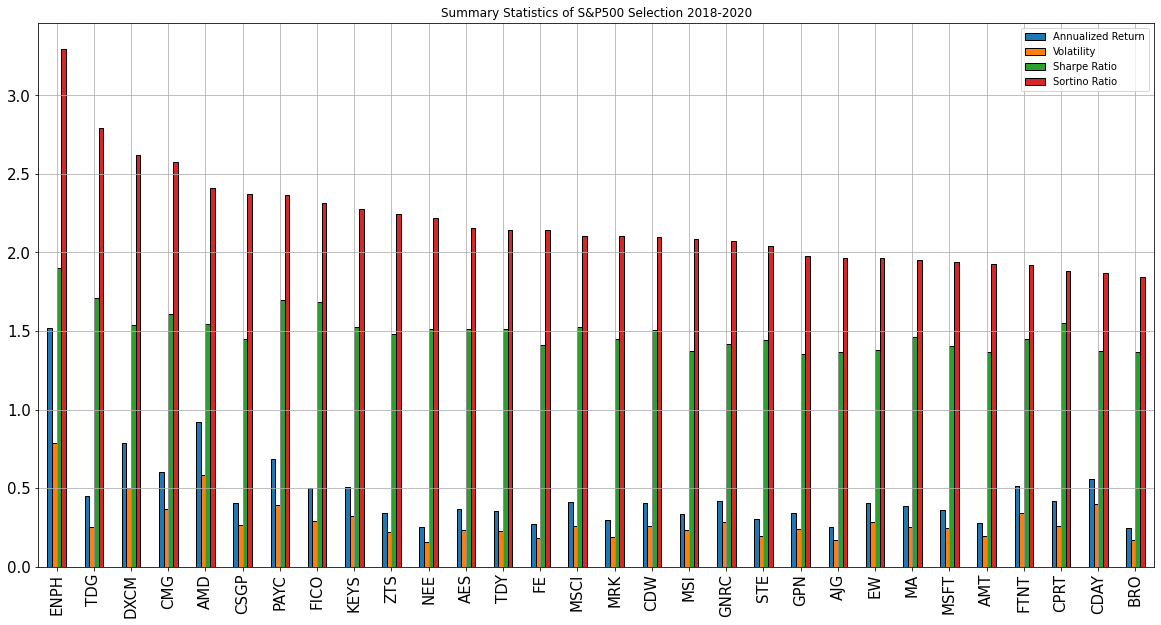

In [3]:
SP = pd.read_csv("Data/sp500.csv", index_col=0)
summary17_20 = vs.selection_data(SP.loc["2018-01-02":"2020-01-02"], 0.0159, "Summary Statistics of S&P500 Selection 2018-2020")[0]
summary17_20